In [2]:
pip install cv2

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
from PIL import Image
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
import sys
import os
import opencv
from os import listdir
from os.path import isfile, join
import scipy
import pylab

ModuleNotFoundError: No module named 'opencv'

In [6]:
im = Image.open('C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run0192/image0000.ppm')
im.save("C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run0192/start.png")

In [2]:
ratio_black = np.zeros((15,15))
for i in range(225):
    im = Image.open('C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/images/'+str(i)+'.jpg')
    pixels = im.getdata()          # get the pixels as a flattened sequence
    black_thresh = 50
    nblack = 0
    for pixel in pixels:
        if sum(pixel) < black_thresh:
            nblack += 1
    n = len(pixels)
    ratio_black[i//15,i%15]= nblack / float(n)

In [3]:
ratio_black = np.zeros((10,10))
for i in range(100):
    im = Image.open('C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run'+str(i).zfill(4)+'/image0000.ppm')
    pixels = im.getdata()          # get the pixels as a flattened sequence
    black_thresh = 50
    nblack = 0
    for pixel in pixels:
        if sum(pixel) < black_thresh:
            nblack += 1
    n = len(pixels)
    ratio_black[i//10,i%10]= nblack / float(n)

In [27]:
data = np.loadtxt("Order_Parameter")

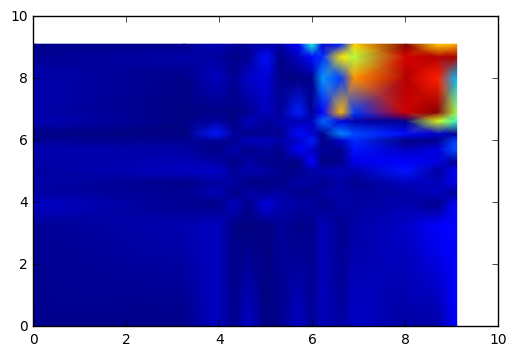

In [37]:
x = np.array([0,1,2,3,4,6,8,12,16,20,30,40,120,240,360])*25
y = np.array([0,1,2,3,4,6,8,12,16,20,30,40,120,240,360])*25
X,Y = np.meshgrid(np.log(x+1),np.log(y+1))
plt.pcolormesh(X,Y,data[::-1], shading='gouraud')

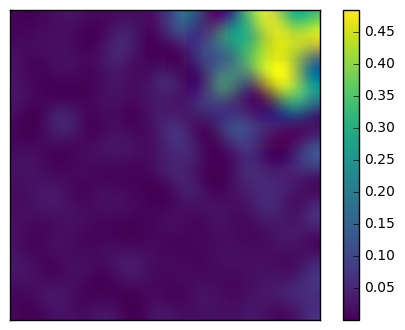

In [34]:
plt.imshow(data, interpolation= "bessel", cmap= 'viridis')
plt.xticks([])
plt.yticks([])
plt.colorbar()

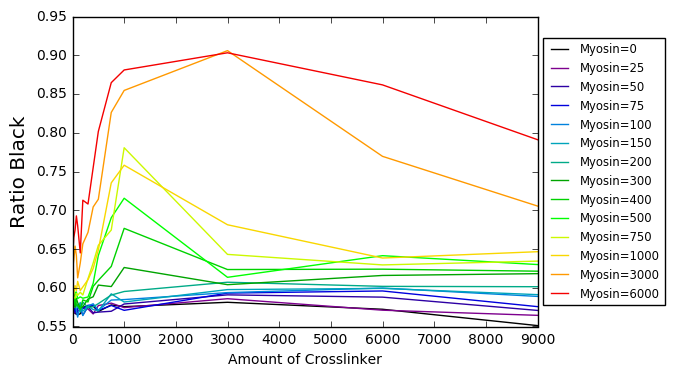

In [12]:
num = np.array([0,1,2,3,4,6,8,12,16,20,30,40,120,240,360])*25
for i in range(14):
    plt.plot(num, ratio_black[i], label = "Myosin="+str(num[i]), c = plt.cm.spectral(i/15))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize = "small")
plt.xlabel("Amount of Crosslinker")
plt.ylabel("Ratio Black", fontsize = 'x-large')

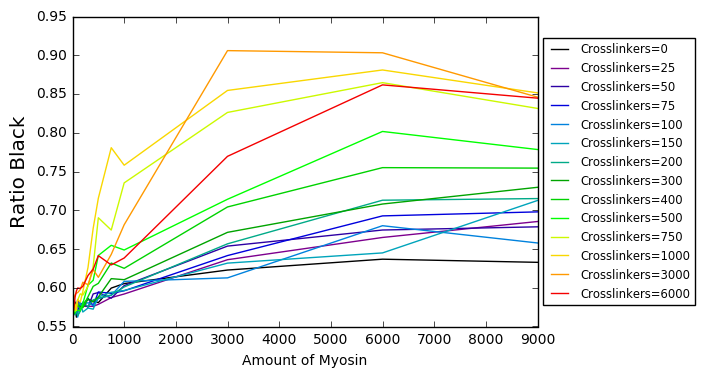

In [13]:
num = np.array([0,1,2,3,4,6,8,12,16,20,30,40,120,240,360])*25
for i in range(14):
    plt.plot(num, ratio_black[:,i], label = "Crosslinkers="+str(num[i]), c = plt.cm.spectral(i/15))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize = "small")
plt.xlabel("Amount of Myosin")
plt.ylabel("Ratio Black", fontsize = 'x-large')

In [383]:
file_name = 'C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run0000/fibers.txt'
f = open(file_name, 'r')
content = f.read()
output = []
for line in content.split('\n'):
    if not line.startswith(('%')):
        output.append(line)
for line in output:
    if line == '':
        output.remove(line)
output = output[1:-1]

In [16]:
np.savetxt("Order_Parameter", rat_black[::-1,][::-1])

In [49]:
for j in range(225):
    if j < 10:
        file_name = 'C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run000'+ str(j)+'/fibers.txt'
    elif j<100:
        file_name = 'C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run00'+ str(j)+'/fibers.txt'
    else:
        file_name = 'C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run0'+ str(j)+'/fibers.txt'
    f = open(file_name, 'r')
    content = f.read()
    output = []
    current_frame = []
    current_fiber = []
    fiber_num = '1'
    for line in content.split('\n'):
        if not line.startswith(('%')):
            if line != '':
                prev_fiber_num = fiber_num
                [fiber_num, x, y] = line.split()
                if prev_fiber_num != fiber_num:
                    current_frame.append(current_fiber)
                    current_fiber = []
                current_fiber.append([int(fiber_num),float(x),float(y)])
                if prev_fiber_num != fiber_num and fiber_num == '1':
                    output.append(current_frame)
                    current_frame = []
    output.append(current_frame)
    #angles_run = []
    cos2_run = []
    cos2_full_run = []
    #full_angles_run = []
    for frame in output:
        angles_frame = []
        full_angles_frame = []
        for fiber in frame:
            #angles_fiber = []
            x_total = fiber[-1][1] - fiber[0][1]
            y_total = fiber[-1][2] - fiber[0][2]
            if x_total != 0:
                full_angles_frame.append(np.arctan(y_total/x_total))
            else:
                full_angles_frame.append(np.pi/2)
            for i in range(len(fiber)-1):
                x = fiber[i+1][1] - fiber[i][1]
                y = fiber[i+1][2] - fiber[i][2]
                if x != 0:
                    angles_frame.append(np.arctan(y/x))
                else:
                    angles_frame.append(np.pi/2)
            #angles_frame.append(angles_fiber)
        #angles_run.append(angles_frame)
        #full_angles_run.append(full_angles_frame)
        cos2_run.append((3*np.mean(np.cos(np.array(angles_frame).flatten() - np.mean(angles_frame))**2)-1)/2)
        cos2_full_run.append((3*np.mean(np.cos(np.array(full_angles_frame).flatten() - np.mean(full_angles_frame))**2)-1)/2)
        
    fig = plt.figure()
    plt.plot(cos2_run)
    plt.ylim(-0.5,1)
    plt.xticks([])
    plt.ylabel(r"$\frac{3\langle cos(\theta)^2 \rangle - 1}{2}$")
    if j < 10:
        plt.savefig('C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/cos_plots/cos2plot000'+str(j)+'.png')
    elif j < 100:
        plt.savefig('C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/cos_plots/cos2plot00'+str(j)+'.png')
    else:
        plt.savefig('C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/cos_plots/cos2plot0'+str(j)+'.png')
    plt.close(fig)
    
    fig = plt.figure()
    plt.plot(cos2_full_run)
    plt.ylim(-0.5,1)
    plt.xticks([])
    plt.ylabel(r"$\frac{3\langle cos(\theta)^2 \rangle - 1}{2}$")
    if j < 10:
        plt.savefig('C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/cos_full_plots/cos2plot000'+str(j)+'.png')
    elif j < 100:
        plt.savefig('C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/cos_full_plots/cos2plot00'+str(j)+'.png')
    else:
        plt.savefig('C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/cos_full_plots/cos2plot0'+str(j)+'.png')
    plt.close(fig)

In [14]:
cos2_end = np.zeros((15,15))
cos2_full_end = np.zeros((15,15))
for j in range(1):
    if j < 10:
        file_name = 'C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run000'+ str(j)+'/fibers.txt'
    elif j<100:
        file_name = 'C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run00'+ str(j)+'/fibers.txt'
    else:
        file_name = 'C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run0'+ str(j)+'/fibers.txt'
    f = open(file_name, 'r')
    content = f.read()
    output = []
    current_frame = []
    current_fiber = []
    fiber_num = '1'
    for line in content.split('\n'):
        if not line.startswith(('%')):
            if line != '':
                prev_fiber_num = fiber_num
                [fiber_num, x, y] = line.split()
                if prev_fiber_num != fiber_num:
                    current_frame.append(current_fiber)
                    current_fiber = []
                current_fiber.append([int(fiber_num),float(x),float(y)])
                if prev_fiber_num != fiber_num and fiber_num == '1':
                    output.append(current_frame)
                    current_frame = []
    output.append(current_frame)
    #angles_run = []
    cos2_run = []
    cos2_full_run = []
    #full_angles_run = []
    frame = output[-1]
    angles_frame = []
    full_angles_frame = []
    for fiber in frame:
            #angles_fiber = []
        x_total = fiber[-1][1] - fiber[0][1]
        y_total = fiber[-1][2] - fiber[0][2]
        if x_total != 0:
            full_angles_frame.append(np.arctan(y_total/x_total))
        else:
            full_angles_frame.append(np.pi/2)
        for i in range(len(fiber)-1):
            x = fiber[i+1][1] - fiber[i][1]
            y = fiber[i+1][2] - fiber[i][2]
            if x != 0:
                angles_frame.append(np.arctan(y/x))
            else:
                angles_frame.append(np.pi/2)
            #angles_frame.append(angles_fiber)
        #angles_run.append(angles_frame)
        #full_angles_run.append(full_angles_frame)
    cos2_end[j//15,j%15] = (3*np.mean(np.cos(np.array(angles_frame).flatten() - np.mean(angles_frame))**2)-1)/2
    cos2_full_end[j//15,j%15] = (3*np.mean(np.cos(np.array(full_angles_frame).flatten() - np.mean(full_angles_frame))**2)-1)/2

In [100]:
order_param = np.zeros((10,10))
for j in range(100):
    file_name = 'C:/cygwin64/home/Calvin Pozderac/cytosim/chugh/run'+ str(j).zfill(4) +'/fibers.txt'
    f = open(file_name, 'r')
    content = f.read()
    output = []
    current_frame = []
    current_fiber = []
    fiber_num = '1'
    counter = 0
    content = content.split('frame   199')
    content = (content[-1]).split('\n')
    fiber_num = 1
    fiber = []
    frame = []
    for line in content:
        if not line.startswith(('%')) and line != '':
            prev_num = fiber_num
            [fiber_num,x,y] = line.split()
            fiber_num = int(fiber_num)
            x = float(x)
            y = float(y)
            if fiber_num != prev_num:
                frame.append(fiber)
                fiber = []               
                fiber.append([x,y])
            else:                
                fiber.append([x,y])
    all_cos = []
    for fib in frame:
        if fib != []:
            dif = np.array(fib)[1:]-np.array(fib)[:-1]
            ang = np.arctan(dif[:,0]/dif[:,1])
            cos = np.cos(ang)
            for c in cos:
                all_cos.append(c)
    order = np.mean(abs(np.array(all_cos)**2-1/2))
    order_param[j//10,j%10] = order

C:\Users\Calvin Pozderac\Anaconda3\lib\site-packages\ipykernel\__main__.py:33: RuntimeWarning: divide by zero encountered in true_divide


KeyboardInterrupt: 

In [101]:
j

53

In [99]:
plt.imshow(order_param, 'viridis')
plt.colorbar()
plt.xticks([])
plt.yticks([])

[[],
 [[-0.534425, -0.161046],
  [-0.497842, -0.197975],
  [-0.461323, -0.234967],
  [-0.424858, -0.272013],
  [-0.388529, -0.309192],
  [-0.352392, -0.346557],
  [-0.316504, -0.384162],
  [-0.280866, -0.422004],
  [-0.245354, -0.459964],
  [-0.209794, -0.497879],
  [-0.174202, -0.535765],
  [-0.138582, -0.573623]],
 [[0.578444, 0.776531],
  [0.623621, 0.79484],
  [0.668794, 0.813162],
  [0.713957, 0.831506],
  [0.759112, 0.849872],
  [0.804302, 0.86815],
  [0.849572, 0.886229],
  [0.894992, 0.903928],
  [0.940605, 0.921123],
  [0.986406, 0.937812],
  [1.03237, 0.954037],
  [1.0785, 0.969814],
  [1.12477, 0.985129],
  [1.17116, 1.0001],
  [1.21767, 1.01471],
  [1.26426, 1.02904],
  [1.3109, 1.04323],
  [1.35756, 1.05735],
  [1.4042, 1.0715]],
 [[0.795434, -0.327566],
  [0.753939, -0.299679],
  [0.71245, -0.271781],
  [0.671062, -0.243733],
  [0.629884, -0.215378],
  [0.588955, -0.186666],
  [0.548318, -0.157542],
  [0.508008, -0.127965],
  [0.468023, -0.0979514],
  [0.428369, -0.067502

In [87]:
frame[-1]

[[-1.74864, -0.525749],
 [-1.70528, -0.501849],
 [-1.66193, -0.477948],
 [-1.61867, -0.453862],
 [-1.57558, -0.429488],
 [-1.53274, -0.404672],
 [-1.49018, -0.37938],
 [-1.44789, -0.353642],
 [-1.40582, -0.327527],
 [-1.36397, -0.30109],
 [-1.32224, -0.274448],
 [-1.28058, -0.247698],
 [-1.23892, -0.220942],
 [-1.19724, -0.194226],
 [-1.15553, -0.167552]]

In [86]:
np.savetxt("Order_parameter", abs(((cos2_full_end*2)+1)/3-1/2).T)

([], <a list of 0 Text yticklabel objects>)

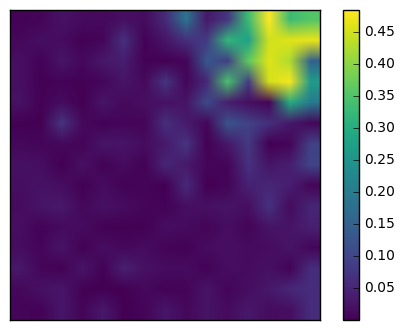

In [49]:
plt.imshow(abs(((cos2_full_end*2)+1)/3-1/2).T, 'viridis')
plt.colorbar()
plt.xticks([])
plt.yticks([])

In [40]:
np.save("cos2_end",cos2_end)
np.save("cos2_full_end",cos2_full_end)

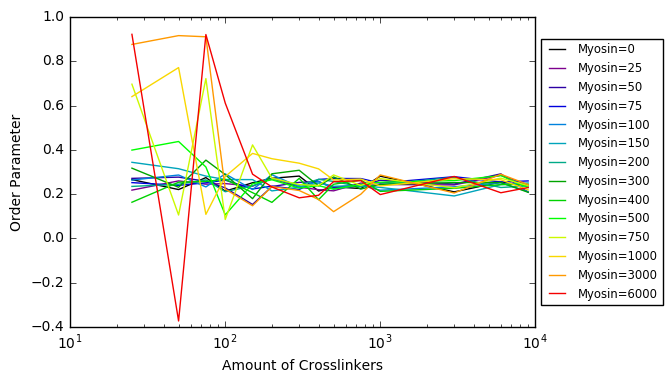

In [24]:
num = np.array([0,1,2,3,4,6,8,12,16,20,30,40,120,240,360])*25
for i in range(14):
    plt.semilogx(num, cos2_end[i], label = "Myosin="+str(num[i]), c = plt.cm.spectral(i/15))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize = "small")
plt.xlabel("Amount of Crosslinkers")
plt.ylabel("Order Parameter")

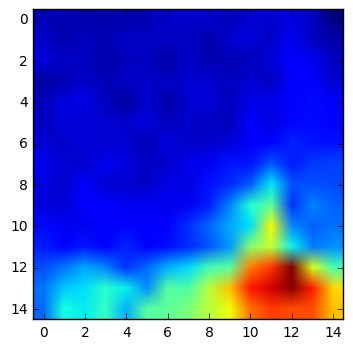

In [11]:
%matplotlib inline
myosin_num = np.array([0,1,2,3,4,6,8,12,16,20,30,40,120,240,360])*25
crosslinker_num = np.array([0,1,2,3,4,6,8,12,16,20,30,40,120,240,360])*25
myosin = np.zeros((15,15))
crosslinker = np.zeros((15,15))
final_chi =  np.zeros((15,15))
for i in range(225):
    myosin[i//15,i%15] = myosin_num[i//15]
    crosslinker[i//15,i%15] = crosslinker_num[i%15]
plt.imshow(ratio_black)

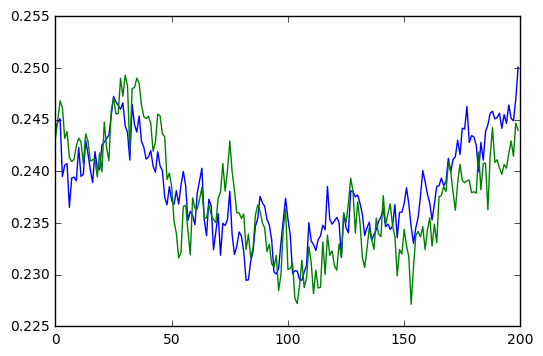

In [44]:
plt.plot(cos2_run)
plt.plot(cos2_full_run)

In [3]:
all_cos2 = []
for run in all_angles:
    cos2 = []
    for frame in run:
        cos2_frame = 0
        count = 1
        for fiber in frame:
            for angle in fiber:
                cos2_frame = cos2_frame + np.cos(angle)**2
                count = count + 1
        cos2.append(cos2_frame/count)
    all_cos2.append(cos2)

In [ ]:
all_full_cos2 = []
for run in all_full_angles:
    full_cos2 = []
    for frame in run:
        full_cos2.append(np.mean(np.cos(np.array(frame))**2))
    all_full_cos2.append(full_cos2)

In [2]:
for j in range(225):
    fig = plt.figure()
    plt.plot(np.linspace(0,1,100))
    plt.ylim(0,1)
    plt.xticks([])
    plt.ylabel(r"$cos(\theta)^2$")
    if j < 10:
        plt.savefig('C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/cos_plots/cos2plot000'+str(j)+'.png')
    elif j < 100:
        plt.savefig('C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/cos_plots/cos2plot00'+str(j)+'.png')
    else:
        plt.savefig('C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/cos_plots/cos2plot0'+str(j)+'.png')
    plt.close(fig)

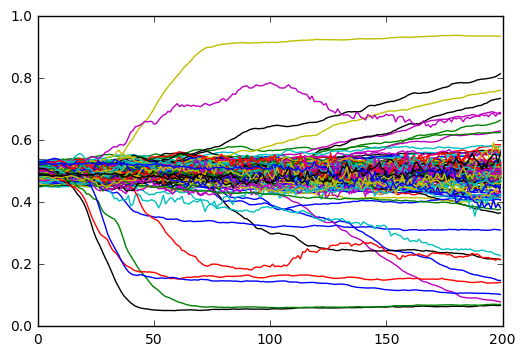

In [31]:
for i in range(225):
    plt.plot(all_full_cos2[i])

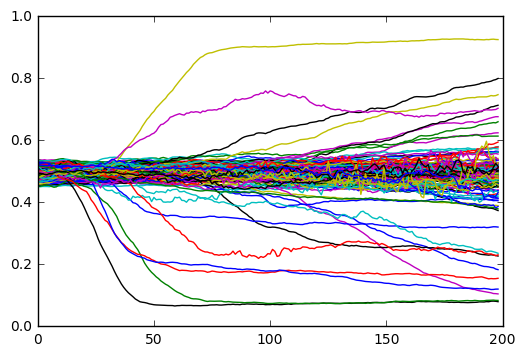

In [415]:
%matplotlib inline
for i in range(225):
    plt.plot(2/3*(np.array(all_S[i])+1/2))

In [341]:
for j in range(198):
    fig = plt.figure()
    plt.plot(np.linspace(0,j+1,j+1),all_chis[162][0:j+1])
    plt.xlim(0,200)
    plt.ylim(0,800)
    plt.xticks([])
    plt.ylabel(r"$\chi^2$")
    if j < 10:
        plt.savefig('C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run0162/images/plot000'+str(j)+'.png')
    elif j < 100:
        plt.savefig('C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run0162/images/plot00'+str(j)+'.png')
    else:
        plt.savefig('C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run0162/images/plot0'+str(j)+'.png')
    plt.close(fig)

In [280]:
for i in range(225):
    if i < 10:
        file_name = 'C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run000'+str(i)+'/image0000.ppm'
    elif i < 100:
        file_name = 'C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run00'+str(i)+'/image0000.ppm'
    else:
        file_name = 'C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run0'+str(i)+'/image0000.ppm'
    im = Image.open(file_name)
    im.save('C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/images/'+str(i)+'.jpg')

In [2]:
9000/600

15.0

In [6]:
n = 10
width = n*600
new_im = Image.new('RGB', (width,width))

#picks = [0,4,10,12]

for i in range(0,width,600):
    for j in range(0,width,600):
        im = Image.open('C:/cygwin64/home/Calvin Pozderac/cytosim/chugh/run'+str(int(i/600*10+j/600)).zfill(4)+'/image0000.ppm')
        im.thumbnail((600,600))
        new_im.paste(im, (i,j))

new_im.save("C:/cygwin64/home/Calvin Pozderac/cytosim/chugh/10x10grid.jpg")

In [78]:
n = 8
width = n*600
new_im = Image.new('RGB', (width,600))

for i in range(0,width,600):
        im = Image.open('C:/cygwin64/home/Calvin Pozderac/cytosim/locally_remove_both/run'+str(int(i/600)).zfill(4)+'/image0000.ppm')
        im.thumbnail((600,600))
        new_im.paste(im, (i,0))

new_im.save("C:/cygwin64/home/Calvin Pozderac/cytosim/locally_remove_both/image.jpg")

In [301]:
for j in range(199):
    frame_num = np.linspace(1,199,199)[j]
    if frame_num < 10:
        file_name = 'C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run0162/image000'+str(int(frame_num))+'.ppm'
    elif frame_num < 100:
        file_name = 'C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run0162/image00'+str(int(frame_num))+'.ppm'
    else:
        file_name = 'C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run0162/image0'+str(int(frame_num))+'.ppm'
    im = Image.open(file_name)
    if j < 10:
        im.save('C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run0162/images/000'+str(j)+'.jpg')
    elif j < 100:
        im.save('C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run0162/images/00'+str(j)+'.jpg')
    else:
        im.save('C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run0162/images/0'+str(j)+'.jpg')

In [380]:
image_folder = "C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch/run0063"
video_name = image_folder + "/video.avi"

images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
frame = cv2.imread(os.path.join(image_folder, images[0]))

height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, -1, 100, (width,height))

for image in images:
    video.write(cv2.imread(image_folder+'/'+image))

cv2.destroyAllWindows()
video.release()

In [359]:
image_folder = "C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run0162/images"
video_name = image_folder + "/video_with_chi.avi"

images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
plots = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
frame2 = cv2.imread(os.path.join(image_folder, plots[0]))

height, width, layers = frame.shape
height2, width2, layers2 = frame2.shape

video = cv2.VideoWriter(video_name, -1, 8, (width+width2,height))

for j in range(min(len(images),len(plots))):
    new_im = Image.new('RGB', (width+width2,height))
    im = Image.open(os.path.join(image_folder, images[j]))
    pl = Image.open(os.path.join(image_folder, plots[j]))
    im.thumbnail((width,height))
    pl.thumbnail((width,height))
    new_im.paste(im, (0,0))
    new_im.paste(pl, (width,int((height-height2)/2)))
    if j < 10:
        new_im.save('C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run0162/images/both000'+str(j)+'.jpg')
    elif j < 100:
        new_im.save('C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run0162/images/both00'+str(j)+'.jpg')
    else:
        new_im.save('C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run0162/images/both0'+str(j)+'.jpg')
        
    if j < 10:
        video.write(cv2.imread('C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run0162/images/both000'+str(j)+'.jpg'))
    elif j < 100:
        video.write(cv2.imread('C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run0162/images/both00'+str(j)+'.jpg'))
    else:
        video.write(cv2.imread('C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run0162/images/both0'+str(j)+'.jpg'))

cv2.destroyAllWindows()
video.release()

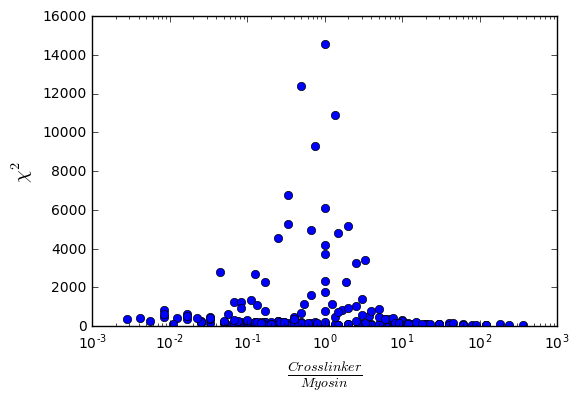

In [365]:
plt.semilogx(crosslinker.flatten()[15:]/myosin.flatten()[15:], final_chi.flatten()[15:],'o')
plt.ylabel(r"$\chi^2$", fontsize = 'x-large')
plt.xlabel(r"$\frac{Crosslinker}{Myosin}$", fontsize = 'x-large')


In [51]:
all_chis = []
for i in range(225):
    print(i)
    if i < 10:
        file_name = 'C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run000'+str(i)+'/fibers.txt'
    elif i < 100:
        file_name = 'C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run00'+str(i)+'/fibers.txt'
    else:
        file_name = 'C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run0'+str(i)+'/fibers.txt'
    f = open(file_name, 'r')
    content = f.read()
    output = []
    current_frame = []
    fiber_num = 0
    frame_counter = 0
    for line in content.split('\n'):
        if not line.startswith(('%')):
            if line != '':
                temp = fiber_num
                [fiber_num, x, y] = line.split()
                if int(temp) > 300 and fiber_num == '1':
                    if frame_counter == 199:
                        output.append(current_frame)
                    current_frame = []
                    frame_counter = frame_counter + 1
                current_frame.append([float(x),float(y)])
    if frame_counter == 199:           
        chis = []
        for frame in output:
            sections = np.zeros(25)
            for point in frame:
                x = int(((point[0]+5)%10)//2)
                y = int(((point[1]+5)%10)//2)
                sections[5*x+y] = sections[5*x+y]+1
            chis.append(np.sum((np.array(sections) - len(frame)/25)**2)/(len(frame)/25))
        all_chis.append(chis)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224


In [7]:
np.save("All_Chis_225",np.array(all_chis)

In [79]:
all_chis = np.load("All_Chis_225.npy")

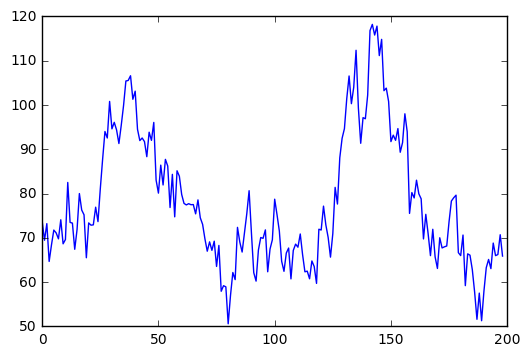

In [81]:
plt.plot(all_chis[50])

In [61]:
last_chi = np.zeros((15,15))
for i in range(225):
    last_chi[i//15,i%15] = all_chis[i][-1]

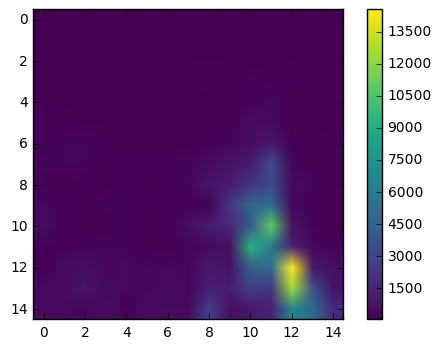

In [63]:
plt.imshow(last_chi, 'viridis')
plt.colorbar()

In [3]:
for i in range(225):
    if len(all_chis[i]) != 199:
        all_chis[i] = np.zeros(199)

In [ ]:
%matplotlib auto
fig = plt.figure()
ims = []
for i in range(199):
    im = plt.imshow(np.reshape([all_chis[x][i] for x in range(225)], (15,15)), animated=True)
    plt.colorbar()
    ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
plt.show()

Using matplotlib backend: Qt5Agg


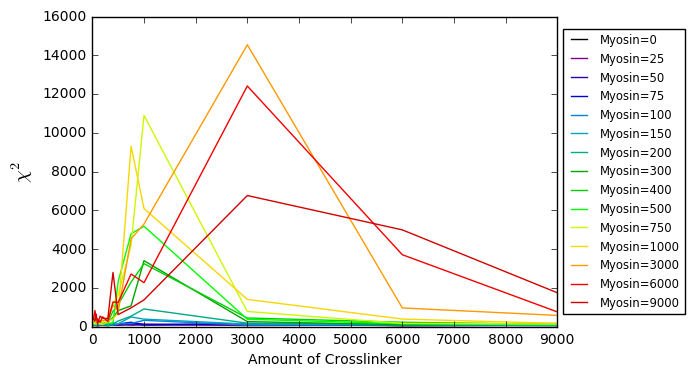

In [367]:
for i in range(15): 
    temp_chis = []
    for j in range(15):
        temp_chis.append(all_chis[15*i+j][-1])
    plt.plot(myosin_num, temp_chis, label = "Myosin="+str(myosin_num[i]), c = plt.cm.spectral(i/15))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize = "small")
plt.xlabel("Amount of Crosslinker")
plt.ylabel(r"$\chi^2$", fontsize = 'x-large')

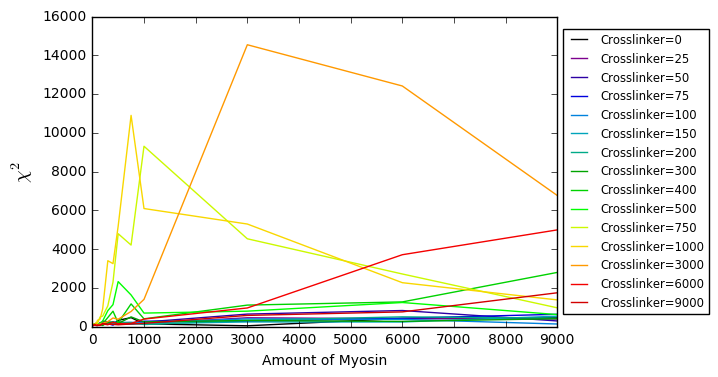

In [368]:
for i in range(15): 
    temp_chis = []
    for j in range(15):
        temp_chis.append(all_chis[15*j+i][-1])
    plt.plot(crosslinker_num, temp_chis, label = "Crosslinker="+str(myosin_num[i]), c = plt.cm.spectral(i/15))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize = "small")
plt.xlabel("Amount of Myosin")
plt.ylabel(r"$\chi^2$", fontsize = 'x-large')

In [378]:
%matplotlib auto
myosin_num = np.array([0,1,2,3,4,6,8,12,16,20,30,40,120,240,360])*25
crosslinker_num = np.array([0,1,2,3,4,6,8,12,16,20,30,40,120,240,360])*25
myosin = np.zeros((15,15))
crosslinker = np.zeros((15,15))
final_chi =  np.zeros((15,15))
for i in range(225):
    myosin[i//15,i%15] = myosin_num[i//15]
    crosslinker[i//15,i%15] = crosslinker_num[i%15]
    final_chi[i//15,i%15] = all_chis[i][-1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(myosin,crosslinker,final_chi)
ax.set_xlabel('Myosin')
ax.set_ylabel('Crosslinker')
ax.set_zlabel('Final Chi^2 Value')

Using matplotlib backend: Qt5Agg


In [104]:
plt.plot(chis)

In [93]:
plt.plot(np.array(output[0])[:,0],np.array(output[0])[:,1],'.')

In [112]:
os.system("ffmpeg -r 10 -i C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch/run0063/images/image%04d.jpg -vcodec mpeg4 -y C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch/run0063/images/movie.mp4")

1

In [238]:
file_name = 'C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run0000/image0001.ppm'
im = Image.open(file_name)
im.save(file_name[:-3] + 'jpg')

In [241]:
for i in range(225):
    for j in range(199):
        frame_num = np.linspace(1,199,199)[j]
        if frame_num < 10:
            file_name = 'C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run0192/image000'+str(int(frame_num))+'.ppm'
        elif frame_num < 100:
            file_name = 'C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run0192/image00'+str(int(frame_num))+'.ppm'
        else:
            file_name = 'C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch_2/run0192/image0'+str(int(frame_num))+'.ppm'
        im = Image.open(file_name)
        im.save(file_name[:-3] + 'jpg')

KeyboardInterrupt: 

In [130]:
for i in range(100):
    if i < 10:
        file_name = 'C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch/run000'+ str(i)+'/myosincrosslinker.txt'
    else:
        file_name = 'C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch/run00'+ str(i)+'/myosincrosslinker.txt'
    f = open(file_name, 'r')
    content = f.read()
    output = []
    for line in content.split('\n'):
        if not line.startswith(('%')):
            output.append(line)
    for line in output:
        if line == '':
            output.remove(line)
    output = output[1:-1]
    final_angle = []
    final_x = []
    final_y = []
    j=0
    num_frames = 1000
    num_filaments = 300
    for j in range(num_frames):
        temp_angle = []
        temp_x = []
        temp_y = []
        k = 0
        for k in range(num_filaments):
            [fiber1,x1,y1] = output[num_filaments*j+2*k].split()
            [fiber2,x2,y2] = output[num_filaments*j+2*k+1].split()
            try:
                temp_angle.append(np.arctan((float(y1)-float(y2))/(float(x1)-float(x2))))
                temp_x.append(np.arctan((float(x1)+float(x2))/2))
                temp_y.append(np.arctan((float(y1)+float(y2))/2))
            except ZeroDivisionError:
                temp.append(np.pi/2)
        final_angle.append(temp_angle)
        final_x.append(temp_x)
        final_y.append(temp_y)
    
    num_myosin = int(1000*(i-i%10)/10)
    num_crosslinker = int(50*(i%10))
    
    fig, ax = plt.subplots( nrows=1, ncols=1 )
    ax.plot([np.mean(angle) for angle in final_angle])
    ax.set_title("Myosin: "+str(num_myosin)+" Crosslinkers: "+str(num_crosslinker))
    ax.set_xlabel("Frame")
    ax.set_ylabel("Mean Angle of Filaments")
    fig.savefig('Angles_myosin_'+str(num_myosin)+'_crosslinker_'+str(num_crosslinker)+'.png')
    plt.close(fig)
    
    fig, ax = plt.subplots( nrows=1, ncols=1 )
    ax.plot([np.mean(x) for x in final_x])
    ax.set_title("Myosin: "+str(num_myosin)+" Crosslinkers: "+str(num_crosslinker))
    ax.set_xlabel("Frame")
    ax.set_ylabel("Mean x_position of Filaments")
    fig.savefig('X_myosin_'+str(num_myosin)+'_crosslinker_'+str(num_crosslinker)+'.png')
    plt.close(fig)
    
    fig, ax = plt.subplots( nrows=1, ncols=1 )
    ax.plot([np.mean(y) for y in final_y])
    ax.set_title("Myosin: "+str(num_myosin)+" Crosslinkers: "+str(num_crosslinker))
    ax.set_xlabel("Frame")
    ax.set_ylabel("Mean y-position of Filaments")
    fig.savefig('Y_myosin_'+str(num_myosin)+'_crosslinker_'+str(num_crosslinker)+'.png')
    plt.close(fig)

In [18]:
midchis = []
for i in range(24):
    if i < 10:
        file_name = 'C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch/HighCrosslinkers/run000'+ str(i)+'/myosincrosslinker.txt'
    else:
        file_name = 'C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch/HighCrosslinkers/run00'+ str(i)+'/myosincrosslinker.txt'
    f = open(file_name, 'r')
    content = f.read()
    output = []
    for line in content.split('\n'):
        if not line.startswith(('%')):
            output.append(line)
    for line in output:
        if line == '':
            output.remove(line)
    output = output[1:-1]
    final_angle = []
    final_x = []
    final_y = []
    j = 0
    num_frames = 1000
    num_filaments = 300
    for j in range(num_frames):
        temp_angle = []
        temp_x = []
        temp_y = []
        k=0
        for k in range(num_filaments):
            [fiber1,x1,y1] = output[num_filaments*j+2*k].split()
            [fiber2,x2,y2] = output[num_filaments*j+2*k+1].split()
            try:
                temp_x.append(np.mod((float(x1)+float(x2))/2+5,10)-5)
                temp_y.append(np.mod((float(y1)+float(y2))/2+5,10)-5)
                temp_angle.append(np.arctan((float(y1)-float(y2))/(float(x1)-float(x2))))
            except ZeroDivisionError:
                temp_angle.append(np.pi/2)
        final_angle.append(temp_angle)
        final_x.append(temp_x)
        final_y.append(temp_y)
        
    i=0
    chi = []
    for i in range(num_frames):
        j=0
        sections = np.zeros(25)
        sections_count = np.zeros(25)
        for j in range(num_filaments):
            x = final_x[i][j]
            y = final_y[i][j]
            x_section = np.floor((x+5)/2)
            y_section = np.floor((y+5)/2)
            section = int(5*x_section+y_section)
            sections_count[section] = sections_count[section] + 1
        chi.append(np.sum((sections_count-num_filaments/25)**2/(num_filaments/25)))
    chis.append(chi)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch/HighCrosslinkers/run0020/myosincrosslinker.txt'

In [4]:
file_name = 'C:/cygwin64/home/Calvin Pozderac/cytosim/actin_patch/run0069/myosincrosslinker.txt'
f = open(file_name, 'r')
content = f.read()
output = []
for line in content.split('\n'):
    if not line.startswith(('%')):
        output.append(line)
for line in output:
    if line == '':
        output.remove(line)
output = output[1:-1]
final_angle = []
final_x = []
final_y = []
j = 0
num_frames = 1000
num_filaments = 300
for j in range(num_frames):
    temp_angle = []
    temp_x = []
    temp_y = []
    k=0
    for k in range(num_filaments):
        [fiber1,x1,y1] = output[num_filaments*j+2*k].split()
        [fiber2,x2,y2] = output[num_filaments*j+2*k+1].split()
        try:
            temp_x.append(np.mod((float(x1)+float(x2))/2+5,10)-5)
            temp_y.append(np.mod((float(y1)+float(y2))/2+5,10)-5)
            temp_angle.append(np.arctan((float(y1)-float(y2))/(float(x1)-float(x2))))
        except ZeroDivisionError:
            temp_angle.append(np.pi/2)
    final_angle.append(temp_angle)
    final_x.append(temp_x)
    final_y.append(temp_y)
    
i=0
chi = []
for i in range(num_frames):
    j=0
    sections = np.zeros(25)
    sections_count = np.zeros(25)
    for j in range(num_filaments):
        x = final_x[i][j]
        y = final_y[i][j]
        x_section = np.floor((x+5)/2)
        y_section = np.floor((y+5)/2)
        section = int(5*x_section+y_section)
        sections_count[section] = sections_count[section] + 1
    chi.append(np.sum((sections_count-num_filaments/25)**2/(num_filaments/25)))

In [24]:
midchis=[chis_mid[i] for i in [3,6,9,33,36,39,63,66,69,93,96,99]]

In [ ]:
image_folder = 'images'
video_name = 'video.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, -1, 1, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

In [4]:
%matplotlib auto
fig, ax = plt.subplots()
line, = ax.plot(midchis[6][::2])
temp = [np.nan] * len(midchis[6][::2])
def init():  # only required for blitting to give a clean slate.
    line.set_ydata(temp)
    return line,
def animate(i):
    temp[i] = midchis[6][2*i]
    line.set_ydata(temp)  # update the data.
    return line,
ani = animation.FuncAnimation(fig, animate,interval=0, save_count=5)
plt.show()

Using matplotlib backend: Qt5Agg


NameError: name 'midchis' is not defined

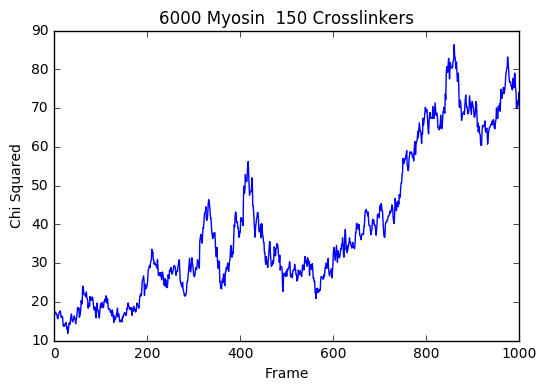

In [50]:
plt.plot(midchis[6])
plt.ylabel("Chi Squared")
plt.xlabel("Frame")
plt.title("6000 Myosin  150 Crosslinkers")

In [31]:
myosin0 = np.concatenate((np.array(lowchis)[0:6,-1],np.array(midchis)[0:3,-1],np.array(highchis)[0:5,-1]))
myosin3000 = np.concatenate((np.array(lowchis)[6:12,-1],np.array(midchis)[3:6,-1],np.array(highchis)[5:10,-1]))
myosin6000 = np.concatenate((np.array(lowchis)[12:18,-1],np.array(midchis)[6:9,-1],np.array(highchis)[10:15,-1]))
myosin9000 = np.concatenate((np.array(lowchis)[18:24,-1],np.array(midchis)[9:12,-1],np.array(highchis)[15:20,-1]))
crosslinkers = [0,25,50,75,100,125,150,300,450,500,1000,1500,2000,2500]

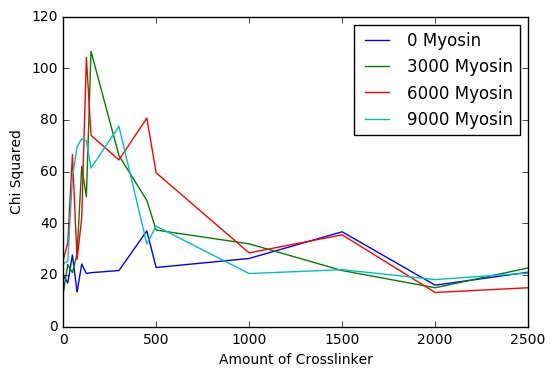

In [45]:
plt.plot(crosslinkers, myosin0, label = "0 Myosin")
plt.plot(crosslinkers, myosin3000, label = "3000 Myosin")
plt.plot(crosslinkers, myosin6000, label = "6000 Myosin")
plt.plot(crosslinkers, myosin9000, label = "9000 Myosin")
plt.legend()
plt.xlabel("Amount of Crosslinker")
plt.ylabel("Chi Squared")

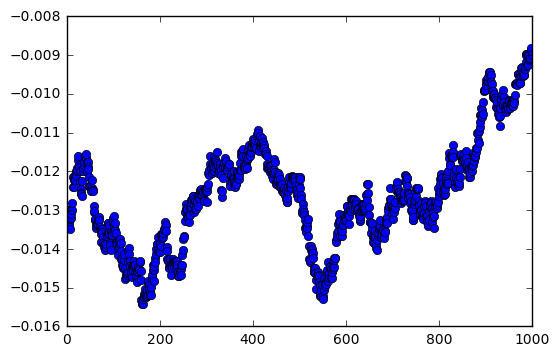

In [128]:
plt.plot([np.mean(x) for x in final_x])

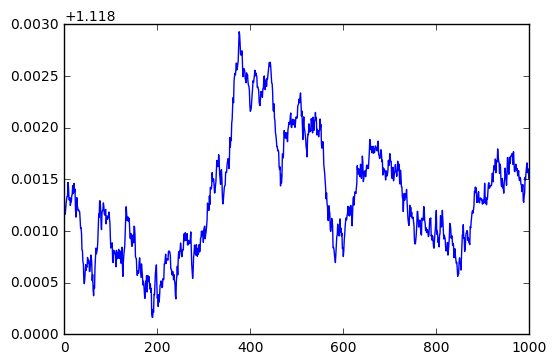

In [125]:
plt.plot([np.std(angles) for angles in final_y])

In [38]:
percent_black_high = []
for i in range(4):
    temp = []
    for j in range(5):
        num = 5*i+j
        if num<10:
            im = Image.open('C:/Users/Calvin Pozderac/Documents/Capstone/Varied Myosin Crosslinker Plots High Crosslinkers/image000'+str(num)+'.jpg')
        else:
            im = Image.open('C:/Users/Calvin Pozderac/Documents/Capstone/Varied Myosin Crosslinker Plots High Crosslinkers/image00'+str(num)+'.jpg')
        pixels = im.getdata()          # get the pixels as a flattened sequence
        black_thresh = 50
        nblack = 0
        for pixel in pixels:
            if sum(pixel) < black_thresh:
                nblack += 1
        n = len(pixels)
        temp.append(nblack / float(n))
    percent_black_high.append(temp)
    
percent_black_low = []
for i in range(4):
    temp = []
    for j in range(6):
        num = 5*i+j
        if num<10:
            im = Image.open('C:/Users/Calvin Pozderac/Documents/Capstone/Varied Myosin Crosslinker Plots Low Crosslinkers/image000'+str(num)+'.jpg')
        else:
            im = Image.open('C:/Users/Calvin Pozderac/Documents/Capstone/Varied Myosin Crosslinker Plots Low Crosslinkers/image00'+str(num)+'.jpg')
        pixels = im.getdata()          # get the pixels as a flattened sequence
        black_thresh = 50
        nblack = 0
        for pixel in pixels:
            if sum(pixel) < black_thresh:
                nblack += 1
        n = len(pixels)
        temp.append(nblack / float(n))
    percent_black_low.append(temp)

percent_black_mid= []
for i in range(4):
    temp = []
    for j in range(3):
        num = 30*i+3*(j+1)
        if num<10:
            im = Image.open('C:/Users/Calvin Pozderac/Documents/Capstone/Varied Myosin Crosslinker Plots Mid Crosslinkers/image000'+str(num)+'.jpg')
        else:
            im = Image.open('C:/Users/Calvin Pozderac/Documents/Capstone/Varied Myosin Crosslinker Plots Mid Crosslinkers/image00'+str(num)+'.jpg')
        pixels = im.getdata()          # get the pixels as a flattened sequence
        black_thresh = 50
        nblack = 0
        for pixel in pixels:
            if sum(pixel) < black_thresh:
                nblack += 1
        n = len(pixels)
        temp.append(nblack / float(n))
    percent_black_mid.append(temp)

In [39]:
percent_black = np.concatenate((percent_black_low,percent_black_mid,percent_black_high),axis=1)

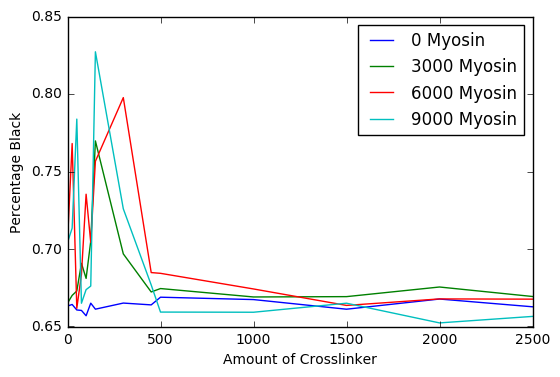

In [47]:
for i in range(4):
    plt.plot([0,25,50,75,100,125,150,300,450,500,1000,1500,2000,2500],percent_black[i], label = str(3000*i) + " Myosin")
plt.legend()
plt.xlabel("Amount of Crosslinker")
plt.ylabel("Percentage Black")